<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 3</h3></center> 



[Notebook](https://colab.research.google.com/drive/1p4SkPHkEe0IFsvdg1NEXC5i_FloTIeLO) due December 21, 2020 at [23.59 EST](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-11-06&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/881881)


#**Choose ANY 2 of the 3 questions for answering.**


In [1]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

import random

import nltk
nltk.download('punkt')
nltk.download('stopwords')

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Qn 1 : Natural Language Processing

**15 points** = $(3 + 4 + 2 + 4 + 2)$                


In this section, you will try to implement functions to obtain the SVD embeddings of words from a text corpus. You will then compare it with Word2Vec.

In [2]:
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/train.txt"
!wget "https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/test.txt"

--2020-12-24 22:42:20--  https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172996 (169K) [text/plain]
Saving to: ‘train.txt.20’

train.txt.20        100%[===================>] 168.94K  --.-KB/s    in 0.04s   

2020-12-24 22:42:21 (4.40 MB/s) - ‘train.txt.20’ saved [172996/172996]

--2020-12-24 22:42:21--  https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31822 (31K) [tex

Read lines from text file

In [3]:
def read_text_and_labels(file_name):
  file = open(file_name)
  lines = file.read().splitlines()
  return [tuple(x.split("\t")) for x in lines]

In [4]:
train_data = read_text_and_labels('train.txt')
test_data = read_text_and_labels('test.txt')

Tokenization


In [5]:
from nltk.tokenize import word_tokenize

def tokenize(data):
  return [word_tokenize(item[0].lower()) for item in data]

Classification Labels extraction

In [6]:
def extract_labels(data):
  return [item[-1] for item in data]

Normalization

In [7]:
from nltk.corpus import stopwords
import string

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

stopwords_english = stopwords.words('english')

In [8]:
def normalize(tokens):
  normalized_tokens = []
  for token_list in tokens:
    normalized = [stemmer.stem(word) for word in token_list if word not in stopwords_english and word not in string.punctuation]
    normalized_tokens.append(normalized)
  return normalized_tokens

In [9]:
train = list(zip(tokenize(train_data),extract_labels(train_data)))
test = list(zip(tokenize(test_data),extract_labels(test_data)))

###(a) Write a function that returns the word-document matrix based on the normalized tokens and any other parameters you would require. Note that each data sample (review) in the dataset can be considered as a document.

In [10]:
labels_train = np.array(train)[:,1]
features_train = np.array(train)[:,0]
dict_train = {}
dict_train["Features"] = features_train
dict_train["Label"] = labels_train
df_train = pd.DataFrame(dict_train)
df_train["Features"] = df_train["Features"].apply(lambda x : " ".join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [11]:
labels_test = np.array(test)[:,1]
features_test = np.array(test)[:,0]
dict_test = {}
dict_test["Features"] = features_test
dict_test["Label"] = labels_test
df_test = pd.DataFrame(dict_test)
df_test["Features"] = df_test["Features"].apply(lambda x : " ".join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tf_idf=TfidfVectorizer(lowercase=False)
train_tf = tf_idf.fit_transform(df_train["Features"])
test_tf = tf_idf.transform(df_test["Features"])
vocabulary = tf_idf.get_feature_names()


In [13]:
def make_word_doc_matrix(data , vocabulary):
  word_doc_matrix = pd.DataFrame(data=data.toarray(), index=vocabulary)    
  return word_doc_matrix

In [14]:
make_word_doc_matrix(train_tf.T , vocabulary)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z500a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zillion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
make_word_doc_matrix(test_tf.T , vocabulary)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z500a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zillion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###(b) Write a function that transforms the review dataset into a dense embedding by representing each review with a dense vector extracted from SVD where dimension = 300. 

In [25]:
from sklearn.decomposition import randomized_svd

In [26]:
def svd_embedding(data,vocabulary):
  svd_embedding_data = {}
  # Call make_word_doc_matrix(data)
  matrix = make_word_doc_matrix(data , vocabulary)
  U, Sigma, VT = randomized_svd(matrix, 
                              n_components=300,
                              n_iter=7,
                              random_state=42)
    
  svd_embedding_data["U"]=U
  svd_embedding_data["Sigma"]=Sigma
  svd_embedding_data["VT"]=VT


  return svd_embedding_data

In [27]:
svd_embedding_train = svd_embedding(train_tf.T , vocabulary)

AttributeError: ignored

In [ ]:
svd_embedding_train

In [ ]:
svd_embedding_test= svd_embedding(test_tf.T,vocabulary)

In [ ]:
svd_embedding_test

### (c) Train a Linear SVC model on the dataset using these SVD document embedding representations and report the accuracy on the test-set. 

### Just add code to compute `svd_train_set` and `svd_test_set` by calling relevant functions and data in the cell below. Then run the following cell.

In [ ]:
svd_train_set = {}
svd_train_set['X'] = svd_embedding_train
svd_train_set['y'] = df_train["Label"]


svd_test_set = {}
svd_test_set['X'] = svd_embedding_test
svd_test_set['y'] = df_test["Label"]


In [ ]:
svd_train_set['X'].shape

In [ ]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=0, tol=1e-5)

classifier.fit(svd_train_set['X'],svd_train_set['y'])

accuracy = classifier.score(svd_test_set['X'],svd_test_set['y'])

print(accuracy)

The cell below downloads a minimal pretrained word embeddings model from Google News dataset. The model includes embeddings for 100,000 words and phrases. (It will take a while)

In [28]:
#Uncomment next line if running locally and not on colab
#!pip install gdown

!gdown https://drive.google.com/uc?id=1kaQdlksJ9jcJJ-q5R3UVjFNb02dYHZVs

Downloading...
From: https://drive.google.com/uc?id=1kaQdlksJ9jcJJ-q5R3UVjFNb02dYHZVs
To: /content/news-word2vec-100k.bin
347MB [00:01, 192MB/s]


The model is loaded using gensim:

In [66]:
import gensim.models

model = gensim.models.KeyedVectors.load_word2vec_format('news-word2vec-100k.bin')

Example of getting the word vector of a word

In [30]:
# Example of getting the Word2Vec

model.get_vector('happy')

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

Getting (top) similar words from the model. We see that the figures indicate the 'similarity score' or dot product of different word vectors.

In [31]:
model.similar_by_word('happy')

[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

### (d) Identify **FOUR interesting pairs of words** which exist both in the vocabulary of the SVD word embeddings and the Word2Vec embeddings that we have here. Compute the similarity score of the pairs of words in each case (in their respective embedding spaces). 

###Reason about which of these two embeddings you would use for a sentiment classification task.

In [32]:
vocabulary2 = [i for i,j in model.vocab.items()]
words_in_the_two_vocab = [i for i in vocabulary2 if i in vocabulary]

In [43]:
# calculate similarity
model_words=[]
svd_words=[]
similar=[]
for word in words_in_the_two_vocab:
  vector_similarity=[]
  for w in words_in_the_two_vocab :
    similarity=model.similarity(w,word)
    if (similarity>=0.9) and (w!=word):
      model_words.append(word)
      svd_words.append(w)
      similar.append(similarity)


In [37]:
similar

[0.92918426,
 0.92918426,
 0.9703434,
 0.93701774,
 0.92651147,
 0.9703434,
 0.96062976,
 0.9456366,
 0.93701774,
 0.96062976,
 0.95083356,
 0.9002422,
 0.92651147,
 0.9456366,
 0.95083356,
 0.9265341,
 0.9002422,
 0.9265341,
 0.96745354,
 0.96745354,
 0.9102556,
 0.933284,
 0.917577,
 0.933284,
 0.90540004,
 0.917577,
 0.90540004,
 0.9102556,
 0.92439204,
 0.92439204,
 0.91913587,
 0.9038174,
 0.91913587,
 0.9038174]

In [63]:
print('similar words:')
print('\n')
print(model_words[2], svd_words[2])
print('\n')
print(model_words[13], svd_words[13])
print('\n')
print(model_words[18], svd_words[18])
print('\n')
print(model_words[22], svd_words[22])

similar words:


three four


six four


north south


completely totally


In [67]:
word11,word12= model.get_vector('three') ,model.get_vector('four') 
word21,word22= model.get_vector('six'),model.get_vector("four")
word31,word32= model.get_vector('north'),model.get_vector("south")
word41,word42= model.get_vector('completely'),model.get_vector("totally")

#similarity of first pair:
s1= np.dot(word11,word12)
print(s1)
#similarity of second pair:
s2=np.dot(word21,word22)
print(s2)
#similarity of third pair:
s3=np.dot(word31,word32)
print(s3)
#similarity of fourth pair:
s4=np.dot(word41,word42)
print(s4)


3.5005383
3.5978324
5.697775
6.3031697


###(e) Identify any 4 reviews **correctly** classified as positive (with respect to sentiment analysis) by the `classifier` in (c) with the SVD *document embeddings* from the `test_data`. In each of these reviews highlight 1 word *in each case* that you think should have lead to a positive prediction. Verify if these 4 words have any similarity relationships as revealed by their SVD *word embedding* representations.    

# Qn 2 : Computer Vision 

**15 points** = $(1.5 + 1 + 1.5 + 1.5 + 1 + 1.5 + 4 + 3)$                

In this section, you will add lines of code to transform a sample image using different filters and see their impact on the prediction by a pretrained image recognition model.



Import of `cv2`  

In [45]:
import cv2

Download the image file `cat.jpg`

In [46]:
!wget 'https://i.ibb.co/SB0c2DW/cat.jpg'

--2020-12-24 23:43:38--  https://i.ibb.co/SB0c2DW/cat.jpg
Resolving i.ibb.co (i.ibb.co)... 172.96.140.18, 104.194.8.196
Connecting to i.ibb.co (i.ibb.co)|172.96.140.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72646 (71K) [image/jpeg]
Saving to: ‘cat.jpg.1’

cat.jpg.1           100%[===================>]  70.94K  --.-KB/s    in 0.1s    

2020-12-24 23:43:39 (557 KB/s) - ‘cat.jpg.1’ saved [72646/72646]



###(a) Read the RGB image and store it in a variable `raw_image`. Resize `raw_image` to have dimensions `224 x 224` with the same RGB channels and store this in the same variable `image` and **display** it. 

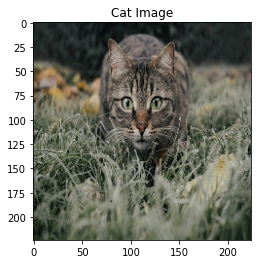

In [47]:
raw_image = cv2.imread('cat.jpg',cv2.IMREAD_UNCHANGED)
raw_image = cv2.cvtColor(raw_image,cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(raw_image,cv2.COLOR_BGR2RGB)
image = cv2.resize(raw_image,(224,224))
plt.imshow(image)
plt.title('Cat Image')
plt.show()

###(b) Convert the `image` into a grayscale image, store it in the variable `grayscale` and display it.

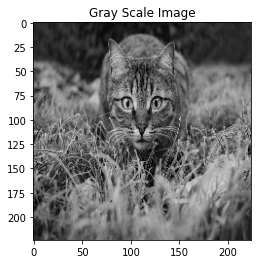

In [48]:
grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale,cmap='gray')
plt.title('Gray Scale Image')
plt.show()

###(c) Consider the image in RGB and generate three images (`r_inverted`, `g_inverted`, `b_inverted`) where in each one the colors of one channel is inverted. **Display** each of the inverted images.

Text(0.5, 1.0, 'Blue inverted Image')

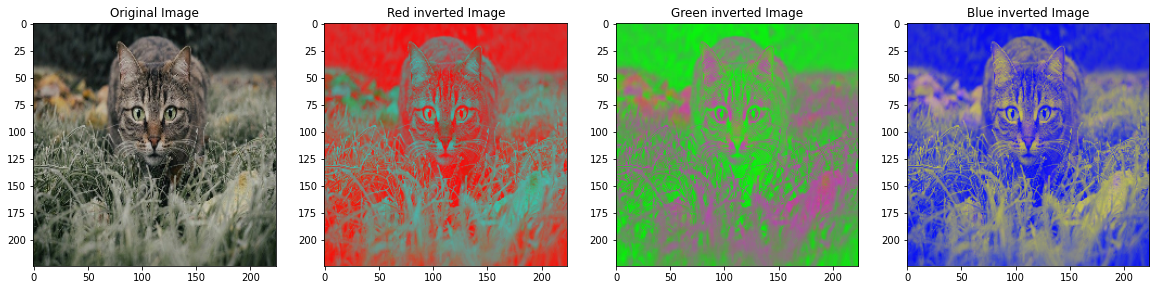

In [49]:
#Inverted images
r_inverted = image.copy()
r_inverted[:,:,0] = 255-r_inverted[:,:,0]

g_inverted = image.copy()
g_inverted[:,:,1] = 255-g_inverted[:,:,1]

b_inverted = image.copy()
b_inverted[:,:,2] = 255-b_inverted[:,:,2]

#Display
fig, axs = plt.subplots(1, 4,figsize=(20, 20))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(r_inverted)
axs[1].set_title('Red inverted Image')
axs[2].imshow(g_inverted)
axs[2].set_title('Green inverted Image')
axs[3].imshow(b_inverted)
axs[3].set_title('Blue inverted Image')


###(d) Implement a filter that makes the image 50% lighter and the filter that makes it 50% darker. Make sure to run the cell below to store the results of applying these filters on `image`. 

###**Display** the resulting images.

In [50]:
def lightening_filter(img):

    lighter_image = img+img/2
    lighter_image = lighter_image.astype(np.int32)
    return lighter_image
    
def darkening_filter(img): 
    darker_image = img/2
    darker_image = darker_image.astype(np.int32)
    return darker_image

In [51]:
lighter_image = lightening_filter(image)
darker_image = darkening_filter(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '50% Lighter Image')

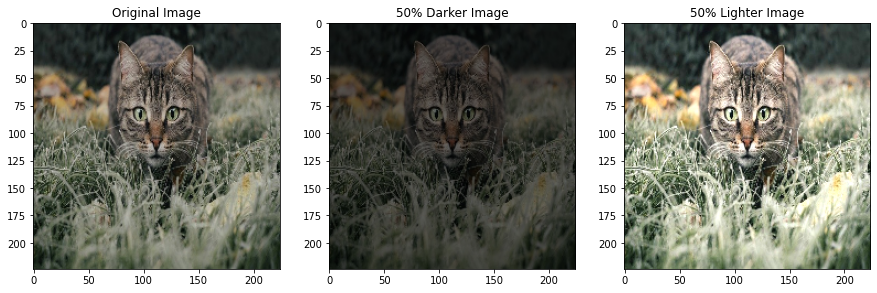

In [52]:
fig, axs = plt.subplots(1, 3,figsize=(15, 15))

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(darker_image)
axs[1].set_title('50% Darker Image')
axs[2].imshow(lighter_image)
axs[2].set_title('50% Lighter Image')

### (e) Implement a filter that transforms an image into its mirror image about the lateral axis. Run the following cell to apply this filter on `image` and store it as `mirror_filter`. ###

###Apply this filter to the image and **display** the output by running the next cell.

In [53]:
def mirror_filter(img):
    
    mirror_image = cv2.flip(img,1)
    return mirror_image  

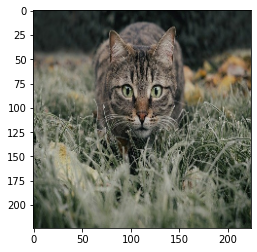

In [54]:
mirror_image = mirror_filter(image)
plt.imshow(mirror_image)

### (f) Write a function that applies a 3 x  3 mean filter on the image. Mean filter is a simple sliding window that replaces the center pixel value with the average of all pixel values in the window. Note that the border pixels remain unchanged.

### Apply this filter to the image and **display** the output by running the next cell.

In [55]:
def mean_filter(img):

  mean_filtered_image = img.copy()
  # mean filter for each channel
  def meanFilter(image):
    Filtered=image.copy()
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            block = image[i-1:i+1+1, j-1:j+2]*1/9
            m = np.sum(block,dtype=np.float32)
            Filtered[i][j] = int(m)
    return Filtered
  
  channel0 = meanFilter(img[:,:,0])
  channel1 = meanFilter(img[:,:,1])
  channel2 = meanFilter(img[:,:,2])

  mean_filtered_image[:,:,0] = channel0
  mean_filtered_image[:,:,1] = channel1
  mean_filtered_image[:,:,2] = channel2
    

  return mean_filtered_image

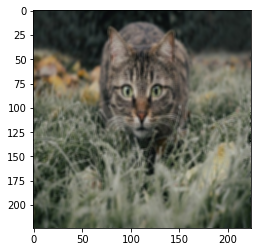

In [56]:
mean_filtered_image = mean_filter(image)
plt.imshow(mean_filtered_image)

### (g) Here you are going to make predictions for the 9 images you generated in the previous parts. A Convolutional Neural Network model (VGG-16) pretrained on [ImageNet](http://image-net.org/) dataset has been loaded as `model`. The dataset has 1000 common natural image categories for prediction.

### Complete the steps to use these 9 sample images as test set and make predictions of categories.

In [57]:
test_set = [image, grayscale, r_inverted, g_inverted, b_inverted, mirror_image, lighter_image, darker_image, mean_filtered_image]

In [58]:
test_set_names = ['image', 'grayscale', 'r_inverted', 'g_inverted', 'b_inverted', 'mirror_image', 'lighter_image', 'darker_image', 'mean_filtered_image']

In [59]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

# Loading the pretrained model with weights from training on ImageNet dataset
model = VGG16(weights='imagenet')

# TODO : [1] Preprocess the test_set images before you can use the model for prediction 
# Hint - preprocess_input()
for i in range(len(test_set)):
  if i==1:
        test_set[i] = cv2.cvtColor(test_set[i],cv2.COLOR_GRAY2BGR)
  else:
    continue
test_set = preprocess_input(np.array(test_set))

# TODO : [2] Use the model to obtain the probabilities for all output classes
predictions_probabilities = model.predict(test_set)


# TODO : [3] Decode the predicted class label with highest probability (top-1) and score to display them
# Hint - Use decode_predictions(___, top=1)[0][0]
classe = decode_predictions(predictions_probabilities, top=1)[0][0]
print(f'The predicted class label with highest probability is : {classe[1]} with score equal to {classe[2]}')

# TODO : [4] Print this for all 9 samples
classes = decode_predictions(predictions_probabilities,top=1)

for i,prediction in enumerate(classes) :
  c = prediction[0][1]
  image_sample = test_set_names[i]
  score = prediction[0][2]
  print('Predicted class [{}] : {} with {:.02f}% probability'.format(image_sample, c, score*100))

The predicted class label with highest probability is : tiger_cat with score equal to 0.89839768409729
Predicted class [image] : tiger_cat with 89.84% probability
Predicted class [grayscale] : lynx with 63.95% probability
Predicted class [r_inverted] : shower_curtain with 20.63% probability
Predicted class [g_inverted] : matchstick with 17.25% probability
Predicted class [b_inverted] : jellyfish with 79.32% probability
Predicted class [mirror_image] : tiger_cat with 86.87% probability
Predicted class [lighter_image] : tiger_cat with 95.18% probability
Predicted class [darker_image] : tiger_cat with 54.30% probability
Predicted class [mean_filtered_image] : tiger_cat with 72.55% probability


### (h) Based on the results you obtained in (g), what can you tell about the impact of the different filters that you implemented on the predictability of the image category by the model? Explain with some intuitions and observations.

The impact of the different filters:


*   The **gray_scale** transformation reduced  the color information from the originale image. The pre trained model VGG expects and  is trained on colored images. Therefore, removing the color chanels has  badly effect the model performance because less information was passed into it so the he prediction score  has decreased.
*   **Generation three images, one for each channel color**, produced inverted images with less informations. This why  we see the worst scores results using this filter, especially for g_inverted and r_inverted versions. 

*   Using the **Darking filter**,  the image becomes more black and we loose informations. Therefore, the pre trained model give us  less score predicting the right label. In the other side,  the **lighting filter** helps the model to predict the image with high score.
*   The **mirror image filter** did not effect the model performance, because this filter  only change the position and keep the informations present in the image.
*   With **the mean filter**, the model still predict the class with a good score but less than the original imager or other filters becuause this filter replaces the center pixel value with the average of all pixel values in the window and by this technique we loose informations.



